In [1]:
import numpy as np
import matplotlib.pylab as plt

## Goal: Implement a numerical differentiator using central difference method. When output is full, return the df/dx, dx, and estimated error.

As discussed in class, because of the two-sidedness of our method, the second term in Taylor series is cancelled.
### Leading term in error: $\epsilon \sim f\varepsilon/dx + f'''dx^2$
### $dx =(\frac{f\varepsilon}{f'''})^{\frac{1}{3}}$

Since the estimate requires we compute the third derivative, we can bootstrap using forward & backward second order derivatives to get third order central derivative. (ref: https://www.mech.kth.se/~ardeshir/courses/literature/fd.pdf)

In [2]:
def ndiff(fun, x, full=False):
    f=fun
    eps = 1e-16
    dx = .01

    # get a very rough idea on what the third derivative is for the function using the third central difference 
    d3f = lambda x: (f(x + 2 * dx)- 2*f(x + dx) + 2*f(x - dx) - f(x - 2 * dx))/(2*dx**3)
    
    dx = np.abs(fun(x) * eps/ d3f(x))**(1/3)
    ### calculate the central derivative
    dfdx = (f(x+dx)-f(x-dx))/(2*dx)
    ### estimate the error
    err = np.abs(f(x)*eps/dx + d3f(x) * dx**2)

    if full == False:
        return dfdx
    else:
        return dfdx, dx, err
    

## Below is test of the ndiff function. The error is on the order which we predicted.
A special case appears when f'''(x) is sufficiently small. If f'''(x) ~< 1e-15, we can plug in some threshold value to prevent "division by zero". 

However, as seen below, the error is still on the same order of magnitude even if we don't do so.

In [3]:
# plots the deviations between function, ndiff, and its "analytical" derivative
def test(fun, dfun, x):
    xx = x
    dfdx, dx, err = ndiff(fun, xx, True)
    plt.plot(xx, np.abs(dfun(xx) - dfdx), label = "Abs. deviation")
    plt.axhline(np.mean(np.abs(dfun(xx) - dfdx)), c='b',ls='--')
    plt.plot(xx, err,'ko',ms=1, label = "Estimated error")
    plt.axhline(np.mean(err),c='k', ls = '--')
    plt.legend()

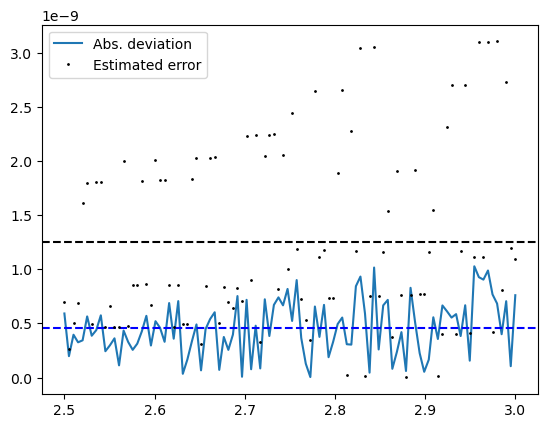

In [4]:
xx = np.linspace(2.5,3, 100)
test(np.exp, np.exp, xx)

At points where sin(x) ->0, the third derivative goes towards zero and our error estimate rings.

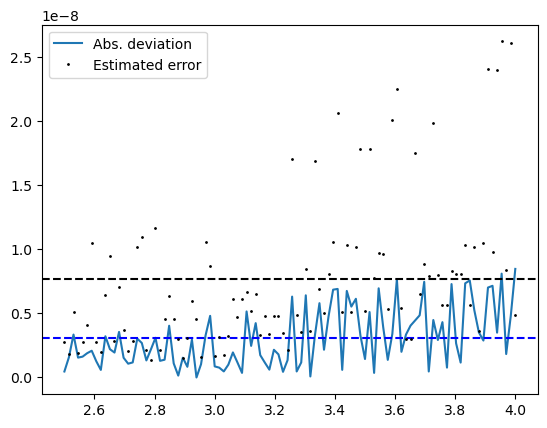

In [5]:
xx = np.linspace(2.5,4, 100)
test(lambda x:x**4, lambda x: 4*x**3, xx)

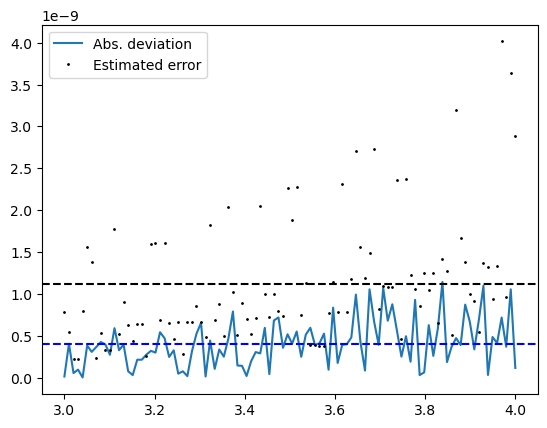

In [6]:
xx = np.linspace(3,4, 100)
test(np.cosh, np.sinh, xx)